<a href="https://colab.research.google.com/github/egag8843/Colab/blob/main/4_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
"""
날짜 : 2021/07/12
이름 : 장경준
내용 : 텐서플로 MNIST 실습
"""

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import drive
from PIL import Image
tf. __version__

'2.5.0'

In [12]:
#학습데이터 불러오기
(mnist_train_data, mnist_train_label),(mnist_test_data, mnist_test_label) = load_data()

In [14]:
#데이터 확인
print(mnist_train_data.shape, mnist_train_label.shape)
print(mnist_test_data.shape, mnist_test_label.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[56279 52208 33186 38514 51860]


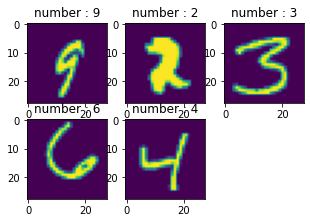

In [22]:
#샘플 이미지 출력
random_idx = np.random.randint(60000, size=5)
print(random_idx)

plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  label = mnist_train_label[idx]
  plt.imshow(mnist_train_data[idx,:])
  plt.title("number : %d"% label)

In [23]:
#학습을 위한 데이터 전처리(정규화)
mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255

#라벨 원핫코딩
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label = to_categorical(mnist_test_label)

In [24]:
#학습모델 설계
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [25]:
#학습모델 설정
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [26]:
#학습하기
model.fit(mnist_train_data, mnist_train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - acc: 0.9159
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1340 - acc: 0.9605
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0991 - acc: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0781 - acc: 0.9766
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653 - acc: 0.9792
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - acc: 0.9826
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0473 - acc: 0.9847
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - acc: 0.9875
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362 - acc: 0.9880
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0313 - acc: 0.9893


In [27]:
#평가하기
model.evaluate(mnist_test_data, mnist_test_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.1026 - acc: 0.9736


[0.10259177535772324, 0.9735999703407288]

In [30]:
#테스트하기
result = model.predict(mnist_test_data)
score = accuracy_score(result.round(), mnist_test_label)
print('score :', score)

for i in range(10):
  print('------------------------------------------')
  print('결과 :', result[i].round())
  print('정답 :', mnist_test_label[i])

score : 0.9722
------------------------------------------
결과 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
정답 : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
------------------------------------------
결과 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
정답 : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
정답 : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
------------------------------------------
결과 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
정답 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
------------------------------------------
결과 : [

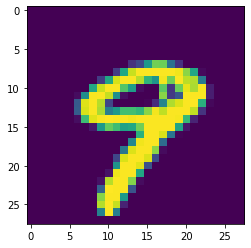

In [32]:
#이미지 출력
plt.imshow(mnist_test_data[9].reshape(28, 28))

In [36]:
#새로운 이미지 불러오기
img_num1 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num1.jpg')
img_num2 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num2.jpg')
img_num3 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num3.jpg')
img_num4 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num4.jpg')
img_num5 = Image.open('/content/drive/MyDrive/Colab Notebooks/file/mnist_num5.jpg')

In [38]:
#이미지 파일 픽셀 데이터 변환
pix_img1 = np.array(img_num1)
pix_img2 = np.array(img_num2)
pix_img3 = np.array(img_num3)
pix_img4 = np.array(img_num4)
pix_img5 = np.array(img_num5)

In [41]:
img_arr = np.array([pix_img1,pix_img2,pix_img3,pix_img4,pix_img5])
img_arr = img_arr / 255
img_arr

result = model.predict(img_arr)
print(result.round())

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
